<a href="https://colab.research.google.com/github/r021n/simple-machine-learing/blob/main/Klasifikasi_Bunga_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fase 1: EDA (Exploratory Data Analysis)

## Memuat Dataset

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


## Melihat Bentuk dan Struktur Data

In [2]:
print("Jumlah baris dan kolom:", df.shape)
print("\nTipe data setiap kolom:")
print(df.dtypes)
print("\nJumlah data per spesies:")
print(df['species_name'].value_counts())

Jumlah baris dan kolom: (150, 6)

Tipe data setiap kolom:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
species_name          object
dtype: object

Jumlah data per spesies:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## Statistik Dasar

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Mengecek Data Kosong

In [4]:
print("Jumlah data kosong per kolom:")
print(df.isnull().sum())

Jumlah data kosong per kolom:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64


## Visualisasi: Histogram

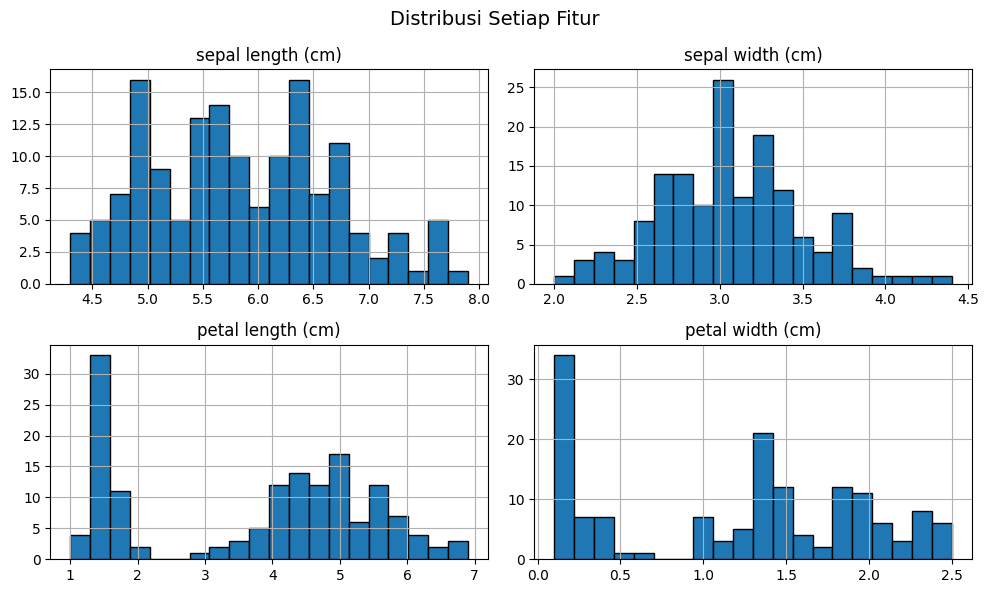

In [5]:
import matplotlib.pyplot as plt

df[iris.feature_names].hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.suptitle('Distribusi Setiap Fitur', fontsize=14)
plt.tight_layout()
plt.show()

## Visualisasi: Scatter Plot

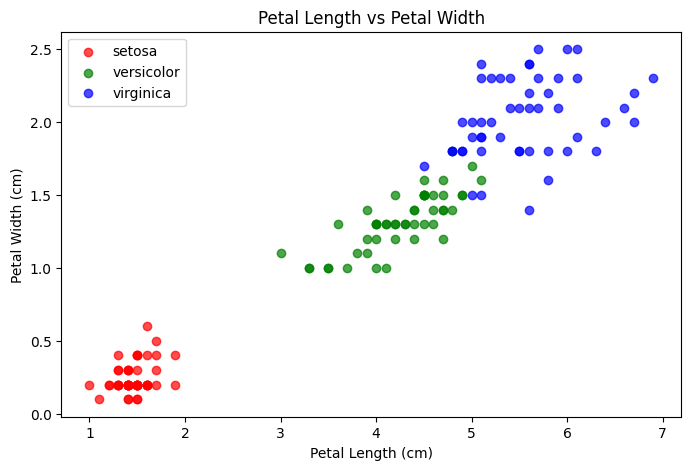

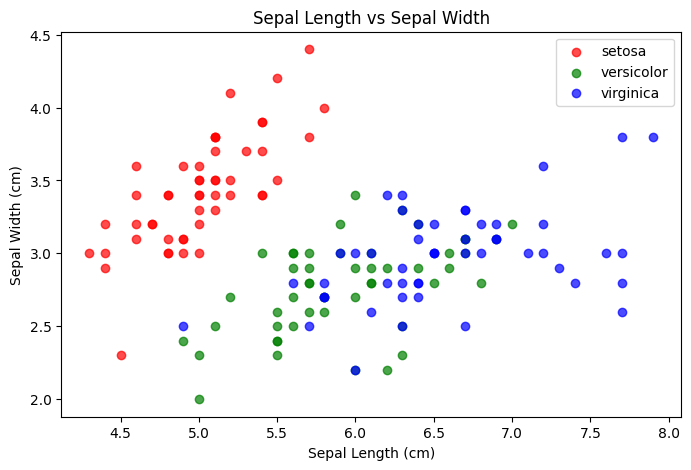

In [6]:
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

plt.figure(figsize=(8, 5))
for species_name, group in df.groupby('species_name'):
  plt.scatter(group['petal length (cm)'], group['petal width (cm)'],
              label=species_name, color=colors[species_name], alpha=0.7)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
for species_name, group in df.groupby('species_name'):
  plt.scatter(group['sepal length (cm)'], group['sepal width (cm)'],
              label=species_name, color=colors[species_name], alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

# Fase 2: Preprocessing

## Memisahkan Fitur dan Target

In [7]:
X = df[iris.feature_names]
y = df['species']

print("Bentuk X:", X.shape)
print("Bentuk y:", y.shape)

Bentuk X: (150, 4)
Bentuk y: (150,)


## Membagi Data Latih dan Data Uji

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 120
Jumlah data uji: 30


## Feature Scaling (Normalisasi)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
print("Sebelum scaling (5 data latih pertama):")
print(X_train.head())
print("\nSesudah scaling (5 data latih pertama):")
print(pd.DataFrame(X_train_scaled, columns=iris.feature_names).head())

Sebelum scaling (5 data latih pertama):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2

Sesudah scaling (5 data latih pertama):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -1.473937          1.203658          -1.562535         -1.312603
1          -0.133071          2.992376          -1.276006         -1.045633
2           1.085898          0.085709           0.385858          0.289218
3          -1.230143          0.756479          -1.218701         -1.312603
4          -1.717731          0.309299          -1.390618         -1.312603


## Verifikasi Hasil Scaling

In [11]:
import numpy as np

print("Rata-rata setiap fitur setelah scaling:")
print(np.round(X_train_scaled.mean(axis=0), 2))
print("\nStandar deviasi setiap fitur setelah scaling:")
print(np.round(X_train_scaled.std(axis=0), 2))

Rata-rata setiap fitur setelah scaling:
[ 0. -0. -0. -0.]

Standar deviasi setiap fitur setelah scaling:
[1. 1. 1. 1.]


# Fase 3: Modeling

## Model KNN (K-Nearest Neighbors)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("Prediksi KNN:", y_pred_knn)
print("Data asli:   ", y_test.values)

Prediksi KNN: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Data asli:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## Model Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

print("Prediksi DT:", y_pred_dt)
print("Data asli:  ", y_test.values)

Prediksi DT: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Data asli:   [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## Perbandingan Cepat

In [14]:
from sklearn.metrics import accuracy_score

akurasi_knn = accuracy_score(y_test, y_pred_knn)
akurasi_dt = accuracy_score(y_test, y_pred_dt)

print(f"Akurasi KNN:           {akurasi_knn:.2%}")
print(f"Akurasi Decision Tree: {akurasi_dt:.2%}")

Akurasi KNN:           100.00%
Akurasi Decision Tree: 100.00%


# Fase 4: Evaluasi

## Classification Report KNN

In [15]:
from sklearn.metrics import classification_report

print("=== Classification Report: KNN ===")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))

=== Classification Report: KNN ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Classification Report Decision Tree

In [16]:
print("=== Classification Report: Decision Tree ===")
print(classification_report(y_test, y_pred_dt, target_names=iris.target_names))

=== Classification Report: Decision Tree ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Confusion Matrix KNN

<Figure size 600x400 with 0 Axes>

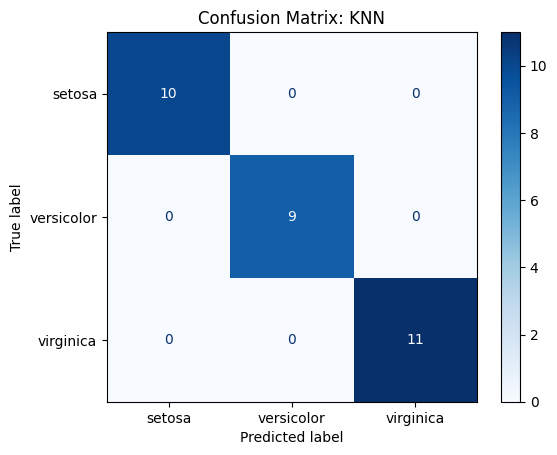

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.figure(figsize=(6, 4))
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(cm_knn, display_labels=iris.target_names)
disp_knn.plot(cmap='Blues')
plt.title('Confusion Matrix: KNN')
plt.show()

## Confusion Matrix Decision Tree

<Figure size 600x400 with 0 Axes>

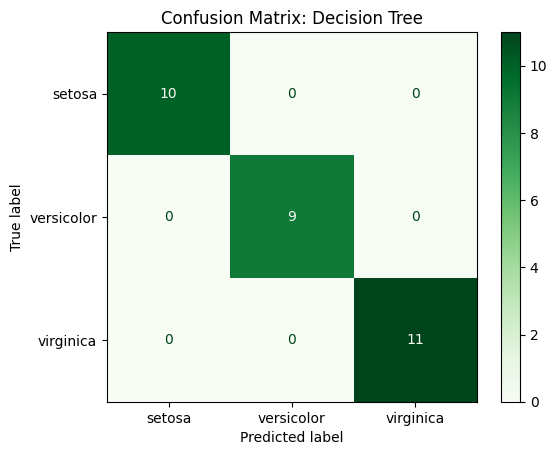

In [18]:
plt.figure(figsize=(6, 4))
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(cm_dt, display_labels=iris.target_names)
disp_dt.plot(cmap='Greens')
plt.title('Confusion Matrix: Decision Tree')
plt.show()

## Perbandingan Akhir

In [19]:
perbandingan = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree'],
    'Akurasi': [akurasi_knn, akurasi_dt]
})
perbandingan['Akurasi'] = perbandingan['Akurasi'].apply(lambda x: f"{x:.2%}")
print(perbandingan.to_string(index=False))

        Model Akurasi
          KNN 100.00%
Decision Tree 100.00%


# Fase 5: Interpretasi

## Fitur Paling Berpengaruh (Decision Tree)

            Fitur  Importance
petal length (cm)    0.906143
 petal width (cm)    0.077186
 sepal width (cm)    0.016670
sepal length (cm)    0.000000


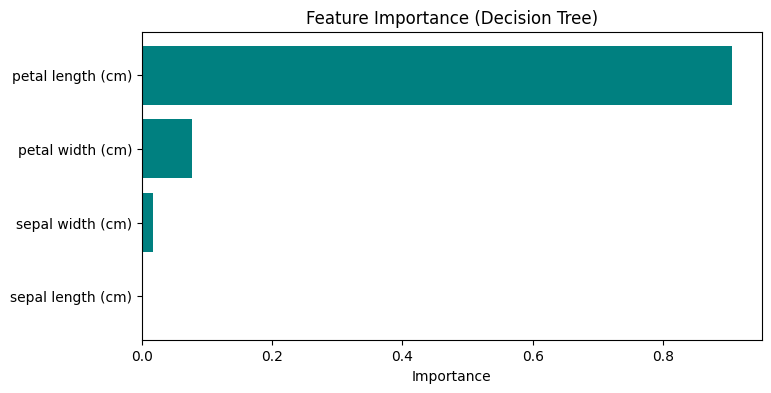

In [20]:
importance = pd.DataFrame({
     'Fitur': iris.feature_names,
     'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

print(importance.to_string(index=False))

plt.figure(figsize=(8, 4))
plt.barh(importance['Fitur'], importance['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importance (Decision Tree)')
plt.gca().invert_yaxis()
plt.show()

## Visualisasi Decision Tree

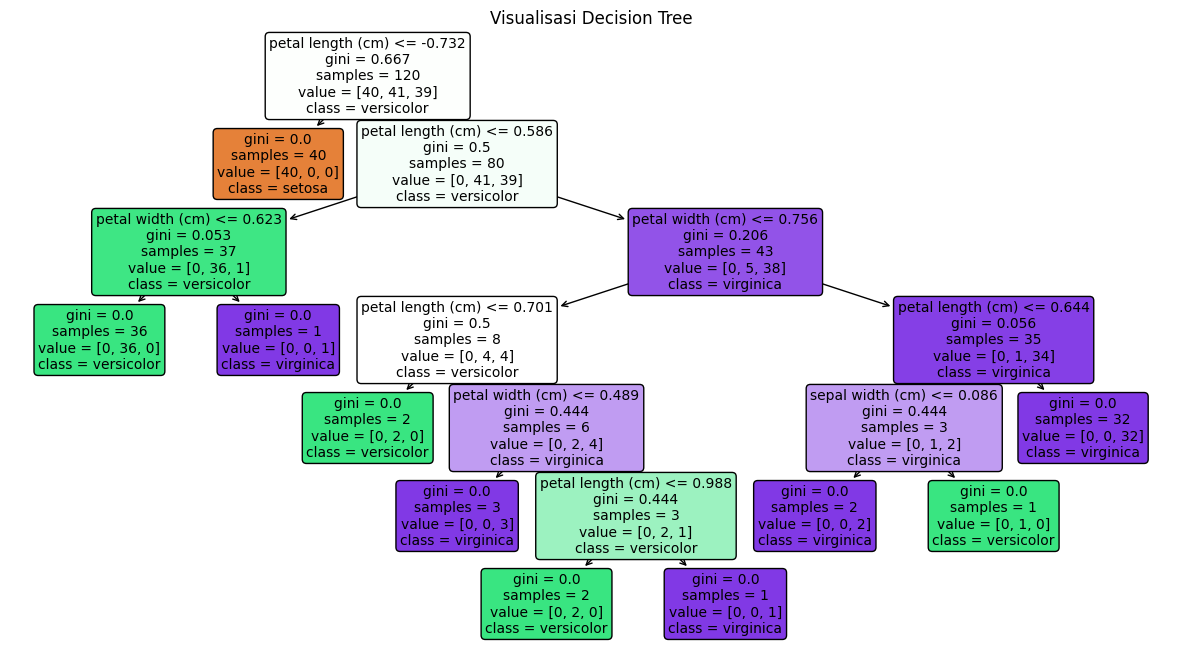

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True, rounded=True, fontsize=10)
plt.title("Visualisasi Decision Tree")
plt.show()

## Prediksi dengan Data Baru

In [22]:
bunga_baru = [[5.0, 3.4, 1.5, 0.2],
              [6.0, 2.8, 4.5, 1.3],
              [7.2, 3.2, 6.0, 1.8]]

bunga_baru_scaled = scaler.transform(bunga_baru)

pred_knn = knn.predict(bunga_baru_scaled)
pred_dt = dt.predict(bunga_baru_scaled)

hasil = pd.DataFrame({
    'Sepal Length': [b[0] for b in bunga_baru],
    'Sepal Width': [b[1] for b in bunga_baru],
    'Petal Length': [b[2] for b in bunga_baru],
    'Petal Width': [b[3] for b in bunga_baru],
    'Prediksi KNN': [iris.target_names[p] for p in pred_knn],
    'Prediksi DT': [iris.target_names[p] for p in pred_dt]
})

print(hasil.to_string(index=False))

 Sepal Length  Sepal Width  Petal Length  Petal Width Prediksi KNN Prediksi DT
          5.0          3.4           1.5          0.2       setosa      setosa
          6.0          2.8           4.5          1.3   versicolor  versicolor
          7.2          3.2           6.0          1.8    virginica   virginica


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Kesimpulan Akhir

In [23]:
print("=" * 50)
print("KESIMPULAN PROJECT KLASIFIKASI BUNGA IRIS")
print("=" * 50)
print(f"\n1. Dataset Iris terdiri dari 150 data dengan 3 spesies (masing-masing 50 data).")
print(f"2. Tidak ada data kosong, sehingga tidak perlu penanganan missing values.")
print(f"3. Dari scatter plot, spesies setosa terpisah jelas dari dua spesies lainnya.")
print(f"4. Akurasi KNN: {akurasi_knn:.2%}")
print(f"   Akurasi Decision Tree: {akurasi_dt:.2%}")
print(f"5. Fitur paling berpengaruh: {importance.iloc[0]['Fitur']} "
      f"(importance: {importance.iloc[0]['Importance']:.4f})")
print(f"6. Kedua model mampu mengklasifikasikan spesies Iris dengan sangat baik.")

KESIMPULAN PROJECT KLASIFIKASI BUNGA IRIS

1. Dataset Iris terdiri dari 150 data dengan 3 spesies (masing-masing 50 data).
2. Tidak ada data kosong, sehingga tidak perlu penanganan missing values.
3. Dari scatter plot, spesies setosa terpisah jelas dari dua spesies lainnya.
4. Akurasi KNN: 100.00%
   Akurasi Decision Tree: 100.00%
5. Fitur paling berpengaruh: petal length (cm) (importance: 0.9061)
6. Kedua model mampu mengklasifikasikan spesies Iris dengan sangat baik.
